# LENDING CLUB CASE STUDY
###### Sivaraman Saptharishi (Siva)

# Problem Statement

1) If the Loan applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

2) If the Loan applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

How consumer attributes and loan attributes influence the tendency of default ? 

# Loan Acceptance and Rejection criteria

When a person applies for a loan, there are two types of decisions that could be taken by the company:

### Loan accepted: 
        If the company approves the loan, there are 3 possible scenarios described below:
#### Fully paid: 
        Applicant has fully paid the loan (the principal and the interest rate)
#### Current: 
        Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
#### Charged-off: 
        Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
### Loan rejected: 
        The company had rejected the loan (because the candidate does not meet their requirements etc.). 
        Since the loan was rejected, there is no transactional history of those applicants with the company and so 
        this data is not available with the company (and thus in this dataset)

# Data Set Analysis

The data contains 39717 rows and 111 columns

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the dataset (loan.csv) present in the same path.
LoanData = pd.read_csv("./loan.csv",low_memory=False)
LoanData.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Fetch Rows & Columns for the given Dataset


In [3]:
def Fetch_Number_of_Columns(DataSet):
    Number_of_Columns = len(DataSet.columns)
    return Number_of_Columns 

def Fetch_Number_of_Rows(DataSet):
    Number_of_rows = len(LoanData.index)
    return Number_of_rows

In [4]:
# Get the number of Rows & Columns in the Dataset
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(LoanData)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(LoanData)))

Number of Columns in the dataset : 111
Number of Rows in the dataset : 39717


##### Null Value Analysis
Nearly for all the rows in 50 columns has only value "NA" values . Lets figure out properly using techniques

In [5]:
def GetNullValue_IndividualCol(DataSet):
     return(DataSet.isnull().sum())

def Get_Null_Value(Data):
    return(Data.sum())

In [6]:
# Total Number of Null Values in the DataSet
Ind_Col_Null_Values = GetNullValue_IndividualCol(LoanData)
Tot_percent_null_values = Get_Null_Value(Ind_Col_Null_Values)
print("Number of null values in the entire dataset : {Num_Null_Values}".format(Num_Null_Values = Tot_percent_null_values))

Number of null values in the entire dataset : 2263364


In [7]:
# Calculate Null Value Percentage
def Calc_Null_Valu_Percentage(DataSet,Tot_Null_Values):
    DataSet_Shape = DataSet.shape[0]*DataSet.shape[1]
    return(Tot_Null_Values/DataSet_Shape)*100

In [8]:
# Calculate Null value percentage in the data set
print("Total percentage of Null values in the dataset : {Tot_percent_null_values}".format(Tot_percent_null_values = Calc_Null_Valu_Percentage(LoanData,Tot_percent_null_values)))

Total percentage of Null values in the dataset : 51.33989643393677


## 51.33 % of the the entire data set has Null Values
Now will analyze which column can be dropped

## Get the number of Columns with Null values 

In [9]:
def Get_the_Col_Null_Values(Ind_Col_Null_Values):
    return(len(Ind_Col_Null_Values[Ind_Col_Null_Values > 0]))

In [10]:
print("Total Number of col with Null Values in the dataset : {Number_of_Col_with_Null_Value}".format(Number_of_Col_with_Null_Value = Get_the_Col_Null_Values(Ind_Col_Null_Values)))

Total Number of col with Null Values in the dataset : 68


## Get the number of Columns where the entire column is NULL

In [11]:
Number_of_Col_with_All_Null = (Ind_Col_Null_Values[Ind_Col_Null_Values == Fetch_Number_of_Rows(LoanData)])
print("Total Number of col with all Null Values in the dataset : {Number_of_Col_with_All_Null}".format(Number_of_Col_with_All_Null = len(Number_of_Col_with_All_Null)))

Total Number of col with all Null Values in the dataset : 54


# Drop Columns with all Null values in the dataset

In [12]:
def DropColumns(DataSet,ColName):
    return(DataSet.drop(columns = ColName))

In [13]:
Col_to_be_dropped = Number_of_Col_with_All_Null.index
Cleaned_LoanData = LoanData
for DropCol in range(len(Col_to_be_dropped)):
    Cleaned_LoanData = DropColumns(Cleaned_LoanData,Col_to_be_dropped[DropCol])

In [14]:
# Total Number of Null Values in the cleaned DataSet_1
Ind_Col_Null_Values_C = GetNullValue_IndividualCol(Cleaned_LoanData)
Tot_null_values_C = Get_Null_Value(Ind_Col_Null_Values_C)
print("Number of null values in the entire dataset : {Num_Null_Values}".format(Num_Null_Values = Tot_null_values_C))

Number of null values in the entire dataset : 118646


In [15]:
print(Calc_Null_Valu_Percentage(Cleaned_LoanData,Tot_null_values_C))

5.2408509502979195


#### Now the percentage of Null values got reduced from 51.33% to 5.24% and the columns with NULL values has been dropped

In [16]:
# Drop Additional columns that does not cater to the problem statement
Additional_Col_To_be_Dropped = ['tax_liens','emp_title', 'title','zip_code','url','member_id','addr_state', 'desc', 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d',"application_type","policy_code","initial_list_status","installment","pymnt_plan","collections_12_mths_ex_med","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt"]
Cleaned_LoanData_1 = Cleaned_LoanData
for DropCol in range(len(Additional_Col_To_be_Dropped)):
    Cleaned_LoanData_1 = DropColumns(Cleaned_LoanData_1,Additional_Col_To_be_Dropped[DropCol])

In [17]:
# Total Number of Null Values in the DataSet
Ind_Col_Null_Val = GetNullValue_IndividualCol(Cleaned_LoanData_1)
print(Ind_Col_Null_Val[Ind_Col_Null_Val>0])
Tot_percent_null_val = Get_Null_Value(Ind_Col_Null_Val)
print("Number of null values in the entire dataset : {Num_Null_Values}".format(Num_Null_Values = Tot_percent_null_val))

emp_length              1075
revol_util                50
last_pymnt_d              71
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64
Number of null values in the entire dataset : 1895


### After removing maximum Null values . now the data is set for cleaning 
From 111 columns , with proper analysis and meticulous removal of null values, we end up in 46 columns for further analysis

In [18]:
Cleaned_LoanData_1.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,May-16,0.0


###### Now we are left with 7 columns that are having null values. Let's address the null values one by one
1) emp_length                    1075                                                                                            2) revol_util                      50
3) last_pymnt_d                    71
4) last_credit_pull_d               2
5) collections_12_mths_ex_med      56
6) chargeoff_within_12_mths        56
7) pub_rec_bankruptcies           697

In [19]:
# Address Employment Length null values (Number of years of employment)
Cleaned_LoanData_1.emp_length.fillna('0',inplace=True)
# extracts the string from the cell and retains only the number
Cleaned_LoanData_1['emp_length']=Cleaned_LoanData_1.emp_length.str.extract('(\d+)') 

In [20]:
# Addressing revolving credit. (This has percentage need to address as well as address the null values)
# Remove the % symbol from revol_util column so that it will be used in calculations--converting it to numeric column
Cleaned_LoanData_1['revol_util'] = Cleaned_LoanData_1['revol_util'].str.rstrip('%')
Cleaned_LoanData_1['int_rate'] = Cleaned_LoanData_1['int_rate'].str.rstrip('%')

In [21]:
# As the null values in these columns are less than 0.5% of the size, we are simply imputing null values with median.
Cleaned_LoanData_1['revol_util'].fillna(Cleaned_LoanData_1['revol_util'].median(),inplace=True)
#Cleaned_LoanData_1['collections_12_mths_ex_med'].fillna(Cleaned_LoanData_1['collections_12_mths_ex_med'].median(),inplace=True)
#Cleaned_LoanData_1['chargeoff_within_12_mths'].fillna(Cleaned_LoanData_1['chargeoff_within_12_mths'].median(),inplace=True)

In [22]:
# Total Number of Null Values in the DataSet
Ind_Col_Null_Val = GetNullValue_IndividualCol(Cleaned_LoanData_1)
print(Ind_Col_Null_Val[Ind_Col_Null_Val>0])
Tot_percent_null_val = Get_Null_Value(Ind_Col_Null_Val)
print("Number of null values in the entire dataset : {Num_Null_Values}".format(Num_Null_Values = Tot_percent_null_val))

last_pymnt_d             71
last_credit_pull_d        2
pub_rec_bankruptcies    697
dtype: int64
Number of null values in the entire dataset : 770


In [23]:
# Last_Payment_Date and credit pull rate can be dropped down still other columns will be supporting for further analysis
Cleaned_LoanData_1 = DropColumns(Cleaned_LoanData_1,'last_pymnt_d')
Cleaned_LoanData_1 = DropColumns(Cleaned_LoanData_1,'last_credit_pull_d')

#### pub_rec_bankruptcies is also plays a major role in loan sanction, we cannot ignore or fill it values with median. 
#### As of now we can consider it as "Not Available"


In [24]:
Cleaned_LoanData_1.pub_rec_bankruptcies.fillna('Not Available',inplace=True)

In [25]:
print(Fetch_Number_of_Columns(Cleaned_LoanData_1))
# Now no null values are present in the data. And we are now left with 44 columns

35


In [26]:
Cleaned_LoanData_1.isna().sum() 

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankru

In [27]:
Cleaned_LoanData_1['term'] = Cleaned_LoanData_1['term'].str.replace(' months','')
# Exported the reduced and cleaned data to csv
Cleaned_LoanData_1.to_csv('LoanData_Cleaned.csv')

###### Now there are no alpha-numeric contents in a single row in all the columns 

# Univariate Analysis

In [28]:
# Numerical Column present 
Cleaned_LoanData_1_bckp = Cleaned_LoanData_1
Covert_to_Numerical = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','annual_inc','dti','emp_length','total_pymnt']

In [29]:
# Converting the column into numeric data
Cleaned_LoanData_1[Covert_to_Numerical] = Cleaned_LoanData_1[Covert_to_Numerical].apply(pd.to_numeric)

In [30]:
# We have date and month in a same column, let us split it 
Cleaned_LoanData_1.issue_d = pd.to_datetime(Cleaned_LoanData_1.issue_d, format='%b-%y')
Cleaned_LoanData_1['year']=Cleaned_LoanData_1['issue_d'].dt.year
Cleaned_LoanData_1['month']=Cleaned_LoanData_1['issue_d'].dt.month

In [31]:
Cleaned_LoanData_1.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36,10.65,B,B2,10,RENT,...,5833.84,5000.00,863.16,0.0,0.00,0.00,171.62,0.0,2011,12
1,1077430,2500,2500,2500.0,60,15.27,C,C4,1,RENT,...,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,2011,12


In [32]:
# Lets start with analysing essential column using describe() function
Cleaned_LoanData_1['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [33]:
Cleaned_LoanData_1['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [34]:
Cleaned_LoanData_1['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [35]:
Cleaned_LoanData_1['total_pymnt'].describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_pymnt'>

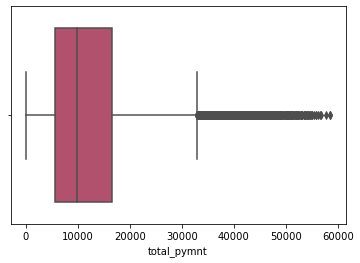

In [37]:
#fig,axes = plt.subplots(1, 3)
sns.boxplot(Cleaned_LoanData_1['total_pymnt'],palette = "flare_r")
#sns.boxplot(Cleaned_LoanData_1['int_rate'],palette = "flare_r",ax=axes[1])
#sns.boxplot(Cleaned_LoanData_1['total_pymnt'],palette = "flare_r",ax=axes[2])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

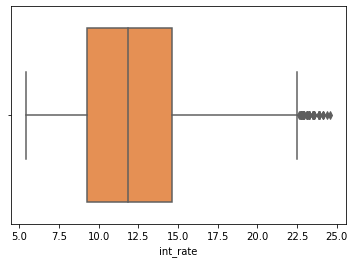

In [38]:
sns.boxplot(Cleaned_LoanData_1['int_rate'],palette = "Oranges")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

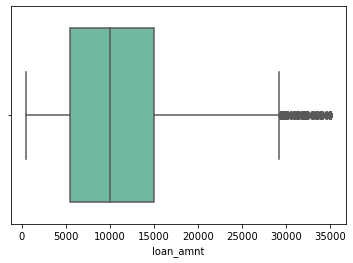

In [39]:
sns.boxplot(Cleaned_LoanData_1['loan_amnt'],palette = "BuGn_r")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

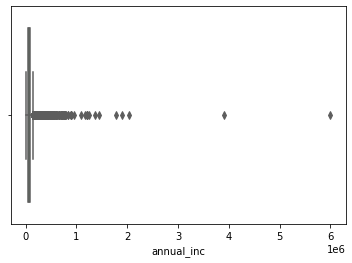

In [40]:
sns.boxplot(Cleaned_LoanData_1["annual_inc"],palette = "Greens")

In [41]:
Cleaned_LoanData_1 = Cleaned_LoanData_1[Cleaned_LoanData_1["annual_inc"] < Cleaned_LoanData_1["annual_inc"].quantile(0.99)]
print(Cleaned_LoanData_1["annual_inc"].describe())

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64


In [42]:
Cleaned_LoanData_1['loan_amnt'].describe()

count    39319.000000
mean     11134.114550
std       7376.086312
min        500.000000
25%       5400.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [43]:
Cleaned_LoanData_1['total_pymnt'].describe()

count    39319.000000
mean     12051.143533
std       8929.135602
min          0.000000
25%       5561.299424
50%       9830.255586
75%      16429.424275
max      58563.679930
Name: total_pymnt, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

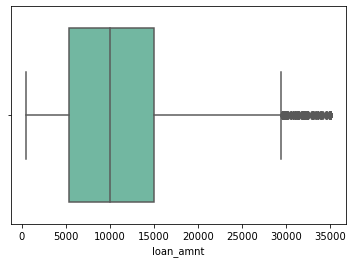

In [44]:
sns.boxplot(Cleaned_LoanData_1['loan_amnt'],palette = "BuGn_r")

#### Based on univariate analysis, the outliers of 0.95 quantile are removed from Annual income. since loan amount is provided based on annual income. Since outlier values will not contribute much for Yes or No

In [45]:
Cleaned_LoanData_1.isnull().sum()

id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
pub_rec_bankru

# Multivariate Analysis

In [46]:
loan_correlation = Cleaned_LoanData_1.corr()
sns.set(font_scale=1.1)
print(len(loan_correlation.index))
loan_correlation.isna().sum()

26


id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
int_rate                   0
emp_length                 0
annual_inc                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
year                       0
month                      0
dtype: int64

Based on the dataset correlationthe following columns collections_12_mths_ex_med, acc_now_delinq,chargeoff_within_12_mths,delinq_amnt doesnt help much for the problem statement and can be further dropped.


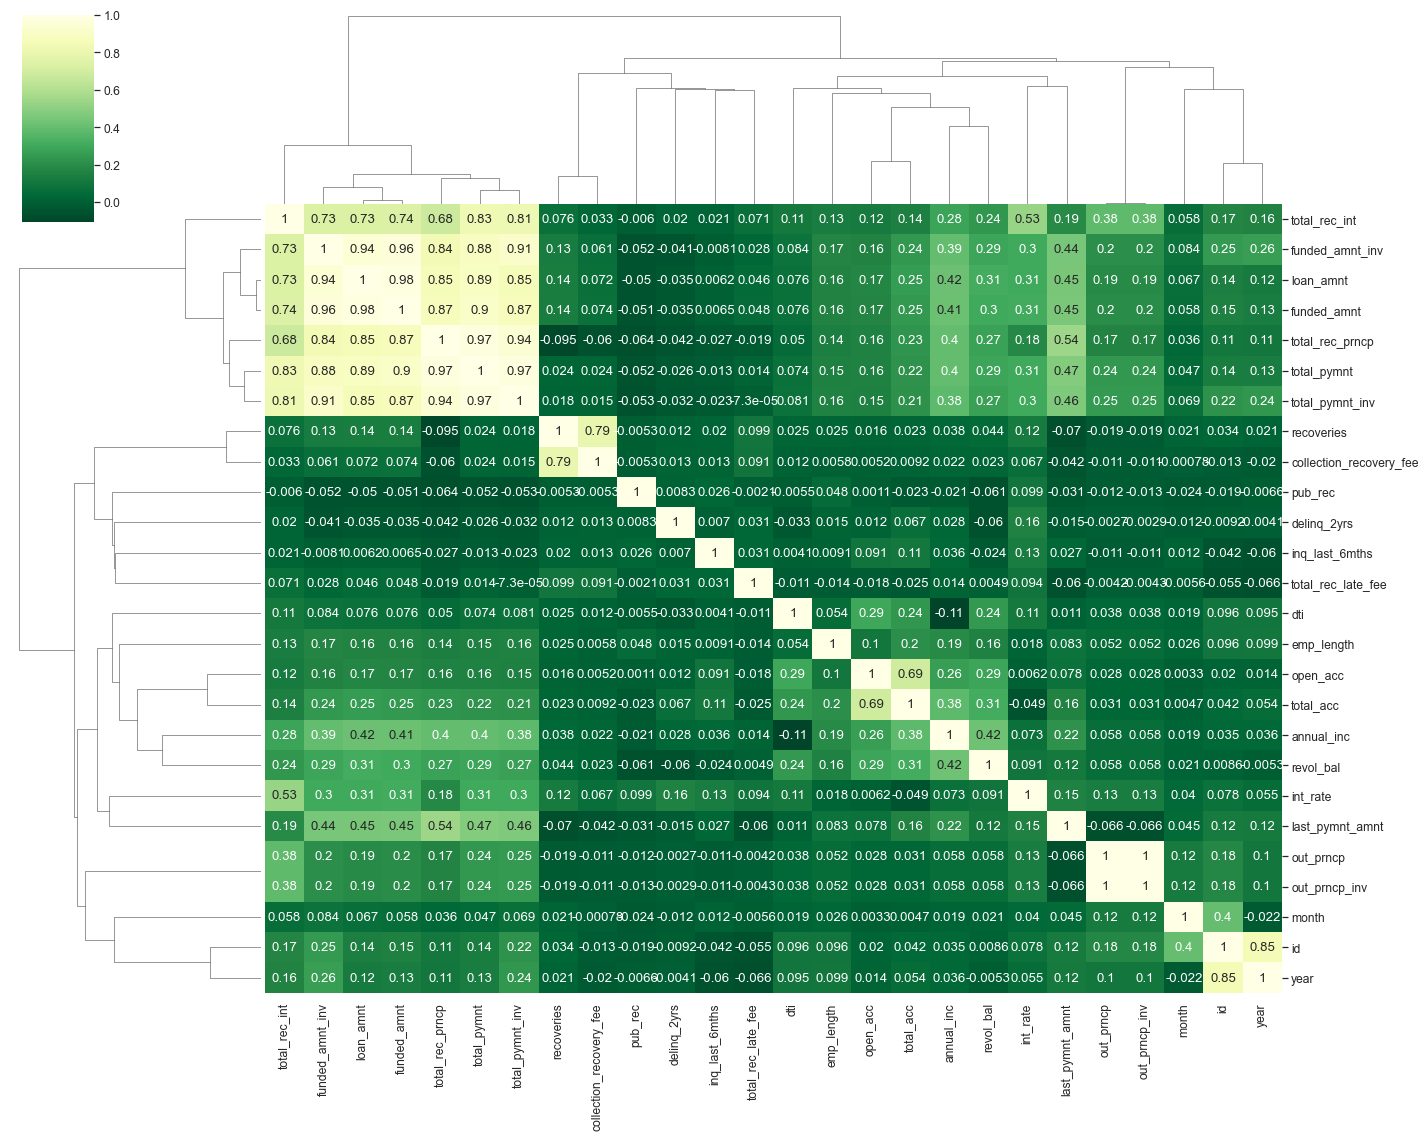

In [47]:
sns.clustermap(loan_correlation,annot=True,figsize=(20, 16),cmap="YlGn_r")
plt.show()

### Inferences from the Correlation matrix
#### 1) dti (Debt income ratio) is negatively correlated with annual income (-0.11)
#### 2) Annual income and employment years are positievely correlated (0.16)
#### 3) Recoveries to collection recovery fees are strongly correalted.
#### 4) A person with increase in Annual income pays the loan.
#### 5) Loan amount, investor amount, funding amount are strongly correlated


## Lets further work on categorical veriables analysis

#### Some of the analysis done to understand where the charge off is more
###### 1) Annual Income across grade for every loan status
###### 2) Loan application count across Home ownership for every loan status
###### 3) Loan application count across Loan repayment term for every loan status

## BarPlot to show variation of annual income across grade for every loan status.

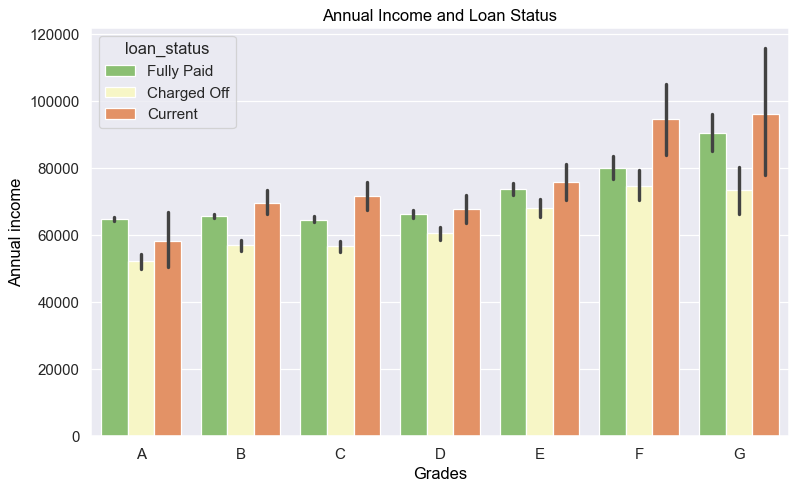

In [48]:
plt.figure(figsize=(10,6), dpi=90, facecolor='w', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", palette="RdYlGn_r",data=Cleaned_LoanData_1, estimator=np.mean,order='ABCDEFG')
ax.set_title('Annual Income and Loan Status',color='black')
ax.set_ylabel('Annual income',color = 'black')
ax.set_xlabel('Grades',color = 'black')
plt.show()

###### 1) One who paid the loan completely has higher annual income than one who is charged off from the loan. 
###### 2) Also the one who is having loan currently is getting higher income than one who is charged off
###### 3) Current loan will be easily paid based on this order G > F > E > C > B > D > A

## BarPlot to show variation of Loan application count across Home ownership for every loan status.

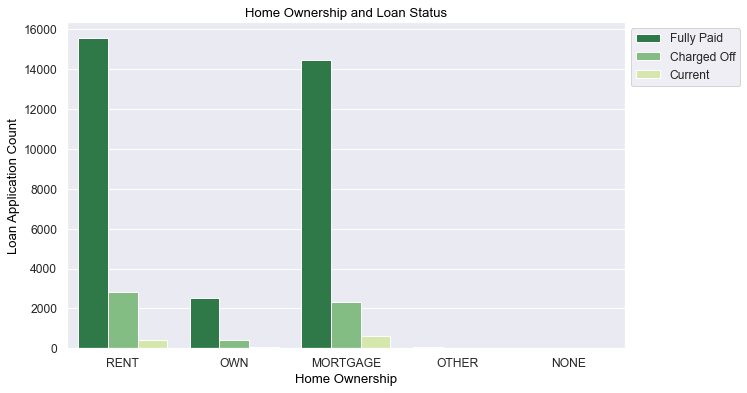

In [49]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="home_ownership",data=Cleaned_LoanData_1,hue='loan_status',palette='YlGn_r')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership and Loan Status',color='black')
ax.set_xlabel('Home Ownership',color = 'black')
ax.set_ylabel('Loan Application Count',color = 'black')      
plt.show()

#### 1) The Fully paid loan is that with most of them living in rented home or mortgaged their home.
#### 2) No current loan with Own house.
#### 3) Charge off for applicants with rental  is higher than mortgage.
#### 4) Charge off is less with applicants who have own houses.

## BarPlot to show variation of Loan application count across Home ownership for every loan status

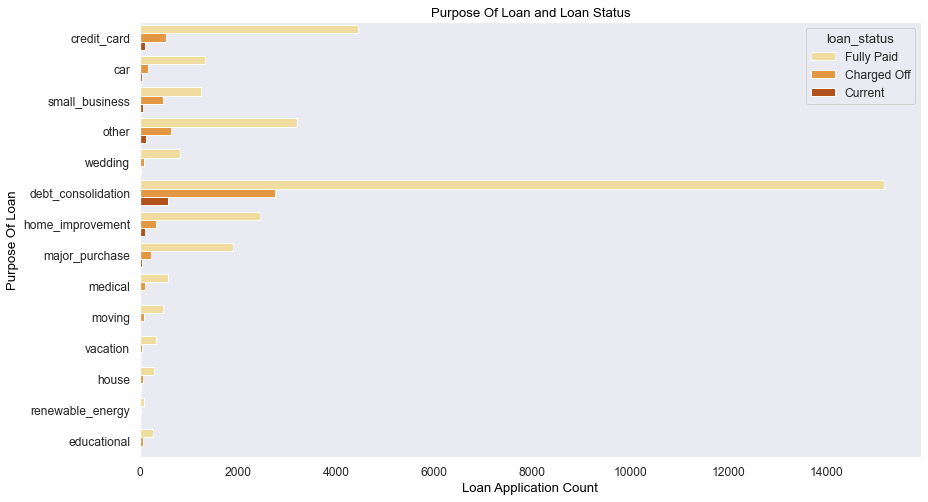

In [50]:
plt.figure(figsize=(14,8),facecolor='w')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=Cleaned_LoanData_1,hue='loan_status',palette='YlOrBr')
ax.set_title('Purpose Of Loan and Loan Status',color='black')
ax.set_ylabel('Purpose Of Loan',color = 'black')
ax.set_xlabel('Loan Application Count',color = 'black')      
plt.show()

#### The plot shows that most of the loans were taken for the purpose of debt consolidation and second most place goes to paying credit card bill.
#### Number of charged off count also high debt consolidation , followed by credit card bills.

# BarPlot to show variation of Loan application count across Loan repayment term for every loan status

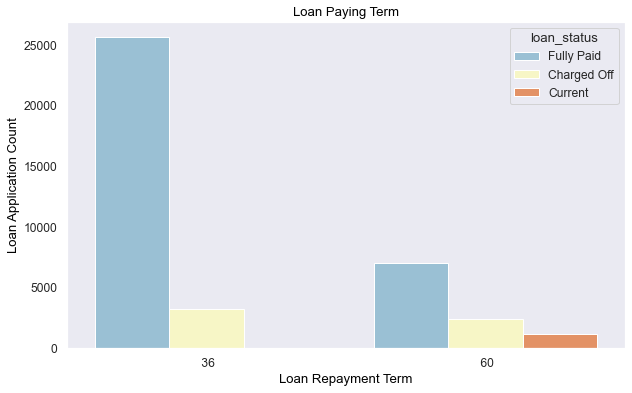

In [51]:
plt.figure(figsize=(10,6),facecolor='w')
ax = sns.countplot(x="term",data=Cleaned_LoanData_1,hue='loan_status',palette='RdYlBu_r')
ax.set_title('Loan Paying Term',color='black')
ax.set_xlabel('Loan Repayment Term',color = 'black')
ax.set_ylabel('Loan Application Count',color = 'black')      
plt.show()

###### Loan Paying Term reduces the charge off also applicant count
##### those who had taken loan to repay in 60 months had more % of number of applicants getting  charged off as compared to applicants who had taken loan for 36 months

## Inference from bivariate analysis (categorical data)
###### So with most of the  analysis we have identified that charge off is more with following reason
###### 1) Less Loan Repayment term
###### 2) If purpose of loan is for debt consolation and for credit card consolation
###### 3) Applicants with rental is higher than mortgage
###### 4) Grades of "F" and "G" have very high chances of charged off.
###### 5) Grades of "A" have low chances of charged off.

### Also the interest rate , employment length doesnt require much analysis since, the effect of the those values are explicitly visible and still remains a fact that person with high employment length has less chances of loan charge off and loan amount with high interest has more chances of charge off.

So lets avoid those two parameters and will work on the other variables with charge off proportion

In [52]:
# 1) To get the loan chargedOff proportion for a particular variable. Get the number of loan charged off for each Loan purpose 
# 2) Get its proportion (proportion_of_chargedoff / Total number of Loan Application)

In [53]:
# Now it is necessary to calculate charged off proportion with respect to Annual income , Loan purpose, public bankruptcy record,
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

Loan_versus_loan_purpose = Cleaned_LoanData_1.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Loan_versus_loan_purpose['Total'] = Loan_versus_loan_purpose['Charged Off'] + Loan_versus_loan_purpose['Current'] + Loan_versus_loan_purpose['Fully Paid'] 
Loan_versus_loan_purpose['Proportion_of_ChargedOff'] = Loan_versus_loan_purpose['Charged Off'] / Loan_versus_loan_purpose['Total']
Loan_versus_loan_purpose.sort_values('Proportion_of_ChargedOff')

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Proportion_of_ChargedOff
13,wedding,94.0,20.0,823.0,937.0,0.100320
6,major_purchase,220.0,37.0,1909.0,2166.0,0.101570
0,car,160.0,50.0,1332.0,1542.0,0.103761
1,credit_card,537.0,102.0,4450.0,5089.0,0.105522
4,home_improvement,338.0,97.0,2459.0,2894.0,0.116793
12,vacation,53.0,6.0,322.0,381.0,0.139108
2,debt_consolidation,2752.0,580.0,15165.0,18497.0,0.148781
7,medical,106.0,12.0,568.0,686.0,0.154519
5,house,58.0,14.0,299.0,371.0,0.156334
8,moving,91.0,7.0,479.0,577.0,0.157712


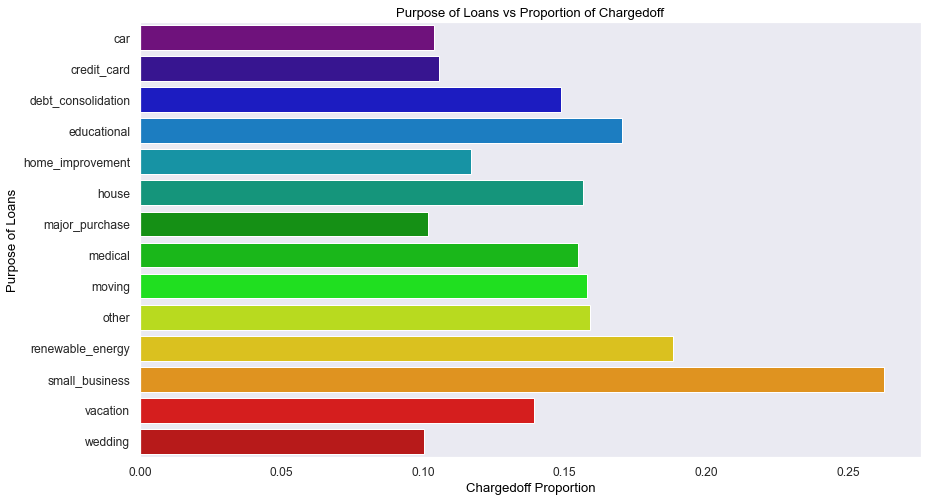

In [54]:
fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='w')
ax1.set_title('Purpose of Loans vs Proportion of Chargedoff',color = 'black')
ax1=sns.barplot(y='purpose', x='Proportion_of_ChargedOff', data=Loan_versus_loan_purpose,palette='nipy_spectral')
ax1.set_ylabel('Purpose of Loans',color='black')
ax1.set_xlabel('Chargedoff Proportion',color = 'black')
plt.show()

#### From the above analysis it is evident that if the loan is provided for small business purpose, the charged off proportion is more

In [55]:
Loan_vs_bankruptcies = Cleaned_LoanData_1.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
Loan_vs_bankruptcies['Total']=Loan_vs_bankruptcies['Charged Off']+Loan_vs_bankruptcies['Current']+Loan_vs_bankruptcies['Fully Paid'] 
Loan_vs_bankruptcies['Proportion_of_ChargedOff'] = Loan_vs_bankruptcies['Charged Off'] / Loan_vs_bankruptcies['Total']
Loan_vs_bankruptcies.sort_values('Proportion_of_ChargedOff')

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,Proportion_of_ChargedOff
0,0.0,5101.0,1087.0,30766.0,36954.0,0.138036
3,Not Available,116.0,0.0,572.0,688.0,0.168605
1,1.0,365.0,37.0,1268.0,1670.0,0.218563
2,2.0,2.0,2.0,3.0,7.0,0.285714


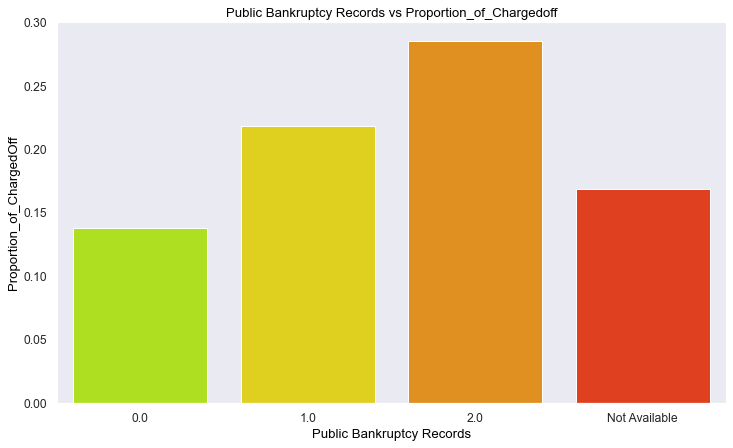

In [56]:
fig, ax1 = plt.subplots(figsize=(12, 7),facecolor='w')
ax1.set_title('Public Bankruptcy Records vs Proportion_of_Chargedoff',color='black')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Proportion_of_ChargedOff', data=Loan_vs_bankruptcies,palette = 'prism_r')
ax1.set_xlabel('Public Bankruptcy Records',color='black')
ax1.set_ylabel('Proportion_of_ChargedOff',color = 'black')
plt.show()

Those who have public bankruptcy records more than 1 have more chargedOff proportion Public Bankruptcy is directly proportinal to high risk of chargedOff 